In [37]:
import matplotlib.pyplot as plot
import numpy

In [ ]:
# Face class
class FACE(object):
    def __init__(self,line):
        i=0
        # 0.photoid, 1.userid, 2.photo_take_time, 3.photo_upload_time, 4.title, 5.description, 6.geotag, 7.lon, 8.lat, 9.accuracy
        self.photoid=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.userid=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.photo_take_time=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.photo_upload_time=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.title=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.description=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.geotag=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.lon=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.lat=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.accuracy=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        # 10.url, 11.facenum, 12.happiness, 13.neutral, 14.sadness, 15.disgust, 16.anger, 17.fear, 18.surprise
        self.url=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.facenum=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        # 按照'happiness', 'neutral', 'sadness', 'disgust', 'anger', 'fear', 'surprise' 的顺序添加情绪指数
        self.happiness=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.neutral=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.sadness=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.disgust=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.anger=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.fear=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.surprise=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        # 19 20.facequality, 21 22.smile, 23.gender, 24.ethnicity, 25.age
        self.facequality_s=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.facequality_v=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.smile_s=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.smile_v=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.gender=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.ethnicity=str(line).split('\n')[0].split('\t')[i]
        i=i+1
        self.age=str(line).split('\n')[0].split('\t')[i]
        self.attribute=str(line).split('\n')[0].split('\t')

In [108]:
# 读取文件
faces=[]
file=open(r'D:\Users\KYH\Desktop\EmotionMap\FlickrEmotionData\3faces_emotion\faceflickr0.txt','r')
print("Read End!")
for line in file.readlines():
    face=FACE(line)
    faces.append(face)
print("Faces: ",len(faces)," in total.")

Read End!
Faces:  430244  in total.


计算不同人种之间的情绪值

In [109]:
asian_face=[]
white_face=[]
black_face=[]
for face in faces:
    if face.ethnicity=="0":
        asian_face.append(face)
    elif face.ethnicity=="1":
        white_face.append(face)
    else:
        black_face.append(face)

In [110]:
#各人种人脸数目
print("Asian:",len(asian_face))
print("White:",len(white_face))
print("Black:",len(black_face))

102403
302678
25163


In [101]:
#计算各人种平均情绪值
black_happy=[float(x.happiness) for x in black_face]
print("Asian:",numpy.mean(black_happy))
white_happy=[float(x.happiness) for x in white_face]
print("White:",numpy.mean(white_happy))
asian_happy=[float(x.happiness) for x in asian_face]
print("Black",numpy.mean(asian_happy))

34.0389520174
35.2368814685
26.7859012922


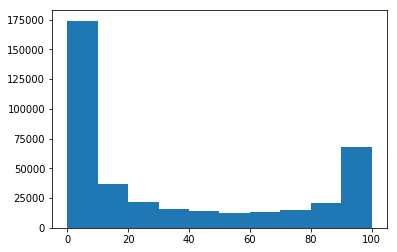

In [102]:
#绘制情绪分布图
plot.hist([float(x.happiness) for x in white_face])
plot.show()

计算不同时间段的情绪值

In [103]:
years=[[] for i in range(15)]
for face in faces:
    face_year=int(face.photo_take_time.split('-')[0])
    if face_year<2000:
        continue
    elif face_year>2014:
        continue
    else:
        years[face_year-2000].append(face)

In [104]:
year_happy=[]
for i in range(15):
    year_happy.append(numpy.mean([float(x.happiness) for x in years[i]]))

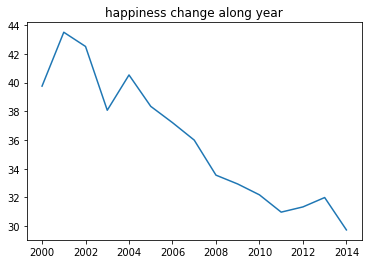

In [105]:
plot.plot(list(range(2000,2015)),year_happy)
plot.title('happiness change along year')
plot.show()

计算照片数量

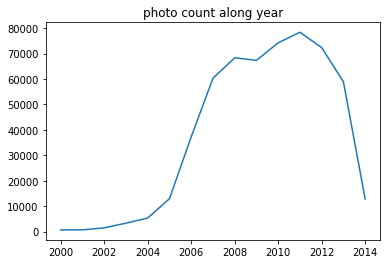

In [106]:
year_count=[]
for i in range(15):
    year_count.append(len(years[i]))
plot.plot(list(range(2000,2015)),year_count)
plot.title('photo count along year')
plot.show()

使用smile计算

In [111]:
#计算各人种笑容比例
facecount=0
for face in black_face:
    if face.smile_v>face.smile_s:
        facecount=facecount+1
print(facecount/len(black_face))
facecount=0
for face in white_face:
    if face.smile_v>face.smile_s:
        facecount=facecount+1
print(facecount/len(white_face))
facecount=0
for face in asian_face:
    if face.smile_v>face.smile_s:
        facecount=facecount+1
print(facecount/len(asian_face))


0.6191630568692127
0.5995116922934604
0.5632159214085525
